# EDA for AGE and YEAR categories

Note: Datasets are downloaded from data.gov.sg, combined into 1 csv file and edited using Resale Price Index.

In [40]:
# Import python libraries that are needed for EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Reading csv file and getting the first 5 observations
df = pd.read_csv('edited_resale_flat_prices.csv')
df.head()

,_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,year_range,age,age_range,RPI,real_price
0,1,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,2015-2019,38,30-39,0.750469,174108.818011
1,2,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,2015-2019,39,30-39,0.750469,187617.260788
2,3,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,2015-2019,37,30-39,0.750469,196622.889306
3,4,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,2015-2019,37,30-39,0.750469,198874.296435
4,5,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,2015-2019,37,30-39,0.750469,198874.296435


In [45]:
# Observe data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225238 entries, 0 to 1225237
Data columns (total 18 columns):
_id                    1225238 non-null int64
month                  1225238 non-null object
town                   1225238 non-null object
flat_type              1225238 non-null object
block                  1225238 non-null object
street_name            1225238 non-null object
storey_range           1225238 non-null object
floor_area_sqm         1225238 non-null float64
flat_model             1225238 non-null object
lease_commence_date    1225238 non-null int64
remaining_lease        109230 non-null object
resale_price           1225238 non-null float64
year                   1225238 non-null int64
year_range             1225238 non-null object
age                    1225238 non-null int64
age_range              1225238 non-null object
RPI                    1225238 non-null float64
real_price             1225238 non-null float64
dtypes: float64(4), int64(4), object(10)
m

Things to take note:
- 4 columns in float data type
- 4 column in integer data type
- 10 columns in object data type
- 'remaining_lease' column only has 93488 non-null object while the rest has 802542 non-null object, which means it contains null values

Since we can find the age of the HDB flats, we don't need the 'remaining_lease' column and can remove it.

In [49]:
# Remove unnecessary columns
df = df[['year', 'year_range', 'month','age','age_range','town','flat_type','real_price','lease_commence_date']]
df.head()

,year,year_range,month,age,age_range,town,flat_type,real_price,lease_commence_date
0,2017,2015-2019,2017-01,38,30-39,ANG MO KIO,2 ROOM,174108.818011,1979
1,2017,2015-2019,2017-01,39,30-39,ANG MO KIO,3 ROOM,187617.260788,1978
2,2017,2015-2019,2017-01,37,30-39,ANG MO KIO,3 ROOM,196622.889306,1980
3,2017,2015-2019,2017-01,37,30-39,ANG MO KIO,3 ROOM,198874.296435,1980
4,2017,2015-2019,2017-01,37,30-39,ANG MO KIO,3 ROOM,198874.296435,1980


# Age Range

Analyzing to see if age affects the resale price and how.

Questions:
1. How age affects resale price
2. How age range affects resale price

In [50]:
df['age_range'].value_counts()

10-19           438104
0-9             329482
20-29           314669
30-39           123718
40 and above     19265
Name: age_range, dtype: int64

Things to note:

- The number of flats sold that are age 40 and above are significantly fewer than 'younger' HDB flats
- The number of flats sold that are in the age range 10-19 are the highest.

In [51]:
# Getting a statistical summary of the category "age_range" and the "real price"
df.groupby(['age_range'])['real_price'].describe()

,count,mean,std,min,25%,50%,75%,max
age_range,,,,,,,,
0-9,329482.0,396909.925058,132326.591457,55255.255255,311111.111111,370370.370370,468920.392585,1.220401e+06
10-19,438104.0,315886.618882,119572.832291,19219.219219,223577.235772,302885.888271,378048.780488,1.031901e+06
20-29,314669.0,274477.952223,101310.021472,18018.018018,209166.410335,254772.765670,322305.223626,9.218914e+05
30-39,123718.0,270471.205090,95311.052553,39229.422067,211360.634082,248126.130783,307597.662258,8.981852e+05
40 and above,19265.0,251941.640328,86726.101279,118043.844857,200037.742970,229629.629630,270168.855535,1.006147e+06


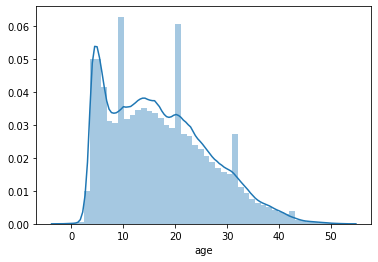

In [73]:
# Plot a distribution plot to show overview of real transactions ages distribution

sns.distplot(df.age)

The histogram has a right skewed/positively skewed distribution and the mean is higher than the median.

/Users/jiaer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


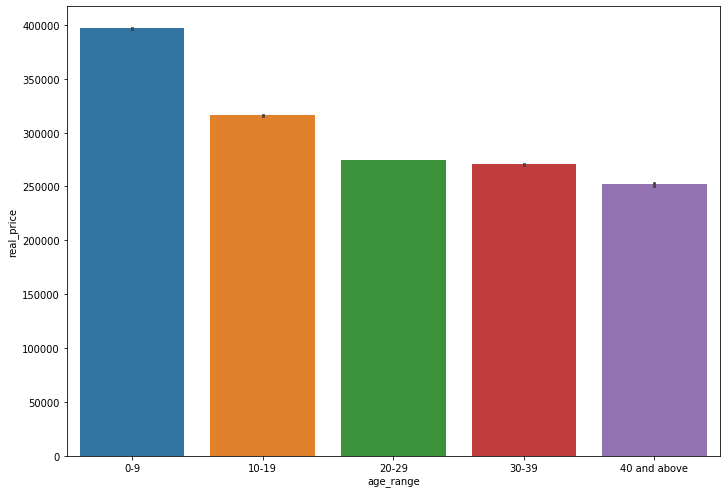

In [53]:
# Plot the bar graph for age_range against real_price
df['age_range']: ['0-9', '10-19', '20-29', '30-39', '40 and above']
df.sort_values("age_range", inplace=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x = 'age_range', y = "real_price", data = df)

There is a linear relationship between the real price and age range of the resale flats.

The 'younger' the resale flat, the more expensive the resale flat.

# Year Range

Analyzing to see if year range affects the resale price and how.

Questions: 
1. How age year/year range affects resale price
2. How age year range affects resale price
3. How age year and flat type affects resale price

'quarter' column has an object data type and 'index' column has a float data type

In [66]:
df['year_range'].value_counts()

2015-2019    328673
2000-2004    274786
2005-2009    223432
2010-2014    155753
1995-1999    145062
1990-1994     97532
Name: year_range, dtype: int64

In [67]:
# Getting a statistical summary of the category "year_range" and the "real price"
df.groupby(['year_range'])['real_price'].describe()

,count,mean,std,min,25%,50%,75%,max
year_range,,,,,,,,
1990-1994,97532.0,278358.176282,183454.990107,18018.018018,156156.156156,216216.216216,357723.577236,1.220401e+06
1995-1999,145062.0,323719.938327,146354.807179,34896.401309,204395.022505,299479.166667,408854.166667,1.035796e+06
2000-2004,274786.0,332162.331867,134655.081083,39229.422067,222767.075306,307083.782812,407047.824524,1.036778e+06
2005-2009,223432.0,320714.716228,101752.661823,53799.596503,240753.194351,307733.691997,377358.490566,9.597047e+05
2010-2014,155753.0,321257.686847,84328.478602,118043.844857,258161.917343,309492.357048,366779.089376,7.588533e+05
2015-2019,328673.0,324866.214639,117268.446633,19858.156028,239407.182215,305343.511450,380452.607412,1.040189e+06


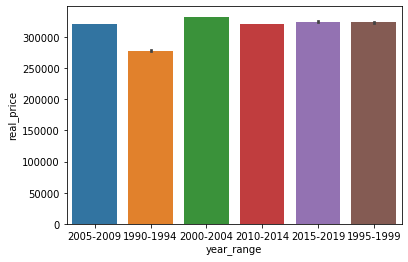

In [69]:
# Plot the bar graph for year_range against resale_price
merged_df['year_range']: ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019']
merged_df.sort_values("year_range", inplace=True)
sns.barplot(x = 'year_range', y = "real_price", data = df)

The real price of resale flat did not change that much.

(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 <a list of 9 Text xticklabel objects>)

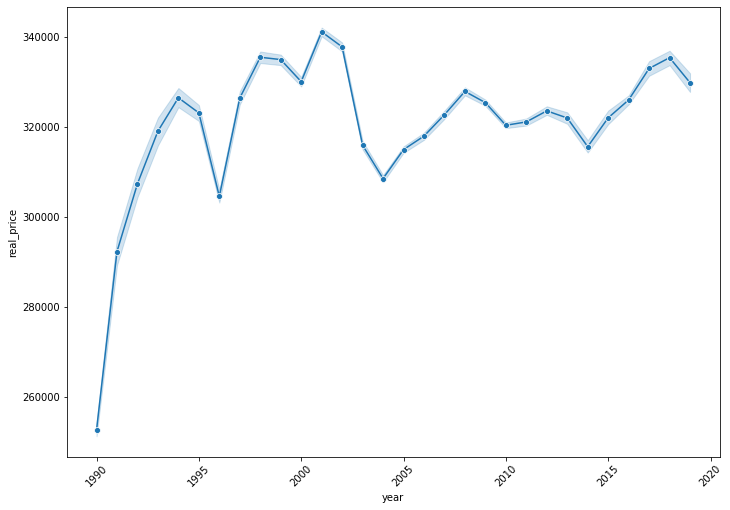

In [78]:
# Plot the line graph for year against real_price
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.lineplot(data=df, x='year', y='real_price', marker='o')
plt.xticks(rotation=45)

The real price of resale flats rise significantly from 1990 to 1995. 

After 1995, it just fluctuates.

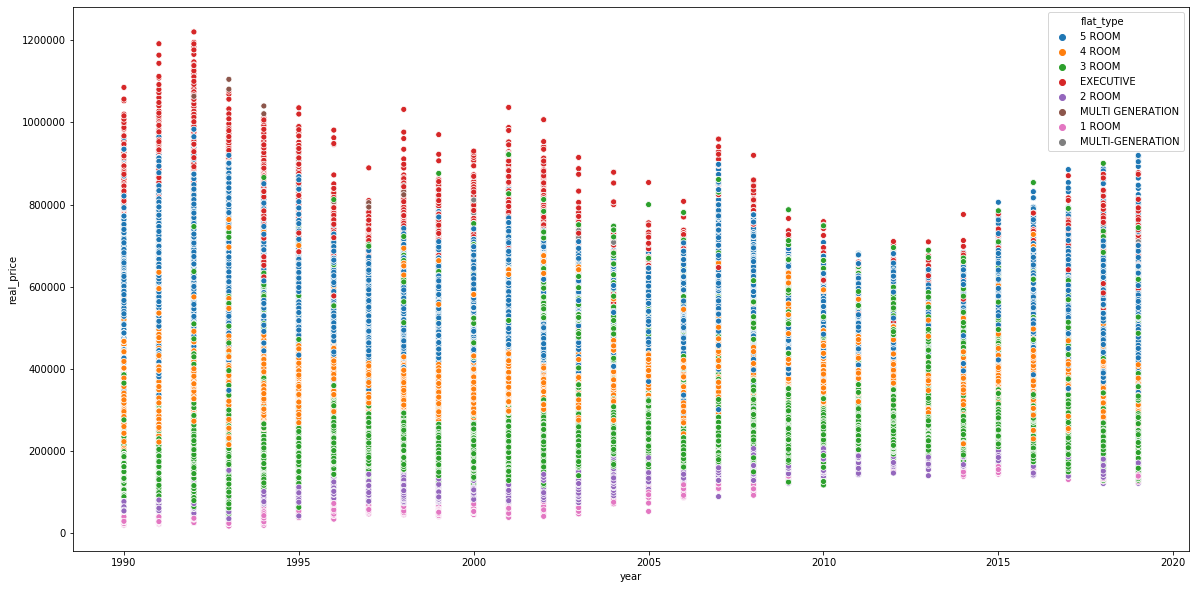

In [68]:
# Plot the scatter plot for year against real_price
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
scatterplot = sns.scatterplot(data=df, x='year', y='real_price', marker='o', hue = 'flat_type')

Real price of resale flats ranging from lowest to highest:
  
  1. Executive
  
  2. 5 room
  
  3. 4 room 
  
  4. 3 room
   
  5. 2 room 
  
  6. 1 room 
    
Multi generation rooms cannot be found easily.

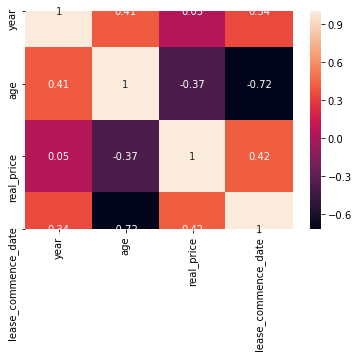

In [59]:
# use heatmap() function
sns.heatmap(df.corr(), annot=True)